In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from sklearn.preprocessing import MinMaxScaler
import torch

import matplotlib.pyplot as plt

from SIPR import SIPR


data_path = 'SIPR/index_data/'
res_path = 'SIPR/res/'


In [ ]:
def train_recognition_module(
    data, dataname=None,
    n_clusters=12,
    l_min=12, l_max=16,
    max_iters=100,
    init_strategy='kmeans++',
    barycenter='dba', gamma=0.5,
    plot_progress=True,
    plot_loss=True,
    store_res=True
    ):
  
  # Run SIPR
  sipr = SIPR(n_clusters, l_min, l_max, gamma)
  sipr.fit(series=data, 
           max_iters=max_iters,
           init_strategy=init_strategy, 
           barycenter=barycenter,
           plot_progress=plot_progress,
           store_res=store_res, dataname=dataname)
  centroids = sipr.centroids
  labels = sipr.labels
  subsequences = sipr.subsequences
  segmentation = sipr.segmentation

  # Save results
  if store_res:
    df_centroids = pd.DataFrame(centroids)
    df_labels = pd.DataFrame(labels)
    df_subsequences = pd.DataFrame(subsequences)
    df_segmentation = pd.DataFrame(segmentation)
    dict_init = {'kmeans++': 'kmpp',
                 'random_sample': 'rs',
                 'random_noise': 'rn',
                 'reference':'ref'}
    filename = f"sipr_{dataname}_k{n_clusters}_l{l_min}-{l_max}_{barycenter[:4]}_{dict_init[init_strategy]}"
    df_centroids.to_csv(res_path + filename + '_centroids.csv')
    df_labels.to_csv(res_path + filename + '_labels.csv')
    df_subsequences.to_csv(res_path + filename + '_subsequences.csv')
    df_segmentation.to_csv(res_path + filename + '_segmentation.csv')
  
  # Plot training loss
  if plot_loss:
    hist_loss = np.array(sipr.hist_loss)
    plt.figure(figsize=(4,2))
    plt.plot(hist_loss, label='total_loss')
    plt.legend(loc='upper right')

  return centroids, labels, subsequences, segmentation



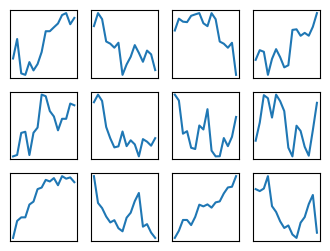

  0%|          | 0/100 [00:00<?, ?it/s]

-- Iter 1 --
Total Loss: 102.51463207089385


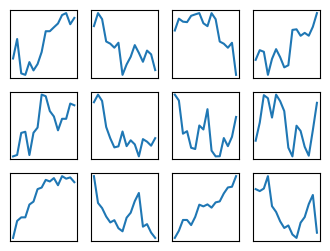

-- Iter 10 --
Total Loss: 90.76798175867921


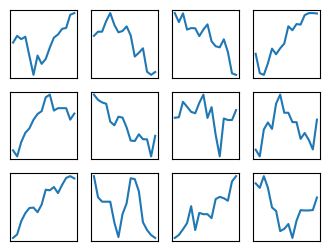

-- Iter 20 --
Total Loss: 91.78481892315607


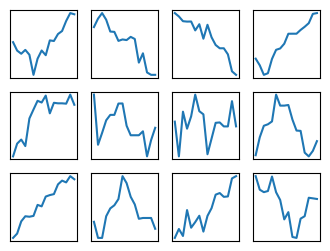

-- Iter 30 --
Total Loss: 89.55835048614307


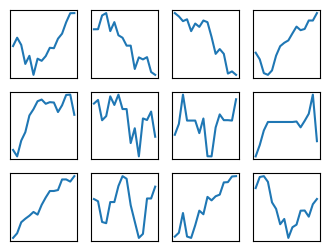

-- Iter 40 --
Total Loss: 92.49211155879425


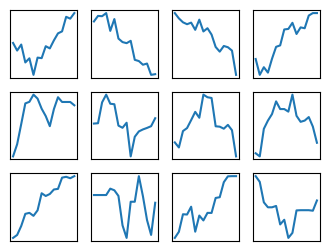

-- Iter 50 --
Total Loss: 92.14592357488601


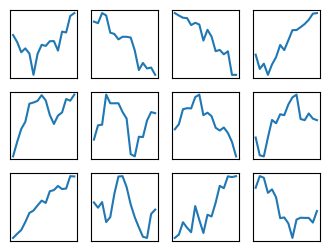

-- Iter 60 --
Total Loss: 98.29346933983544


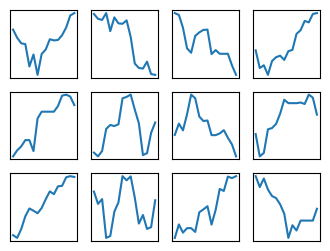

-- Iter 70 --
Total Loss: 94.24017895246205


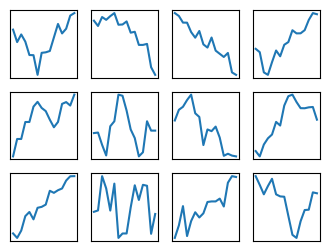

-- Iter 80 --
Total Loss: 89.38761435516118


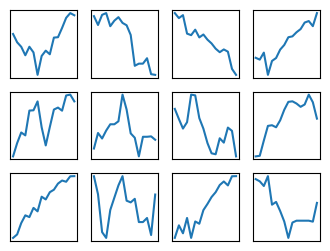

-- Iter 90 --
Total Loss: 90.66645404001345


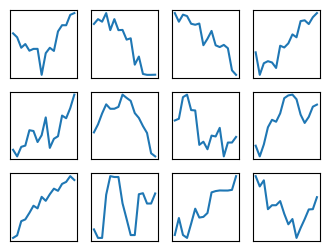

-- Iter 100 --
Total Loss: 89.98230580164271


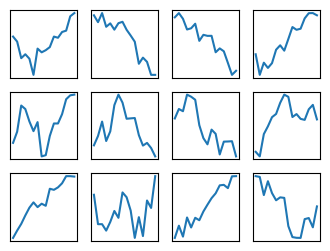

(array([[0.6285797790867372, 0.5613938542286178, 0.7019951913847685,
         0.3852408694710375, 0.3720276340157118, 0.33573220983408636,
         0.04455315930276862, 0.3993882851022251, 0.36809813757613496,
         0.43507826385747794, 0.5065107129930477, 0.6200558178045085,
         0.6876149594462574, 0.7700344249085737, 0.9214560090097585,
         0.9787234042553193],
        [0.8086827009621612, 0.8373939125711104, 0.9374870278496672,
         0.6928319429555413, 0.6655520423622807, 0.7888642343609685,
         0.7490317189341842, 0.7139373293015486, 0.5827168609888096,
         0.46245236772736426, 0.5611386578457053, 0.140937536555074,
         0.128396406590135, 0.20592295735658164, 0.0006733251038046925,
         0.0],
        [0.9582118528972065, 0.8863074598193984, 0.876497712957964,
         0.8354321143289396, 0.817784083846, 0.491712406484132,
         0.6760339019724908, 0.6322594830458736, 0.37271621062732796,
         0.4199022209772489, 0.33733190742401103, 0.3487

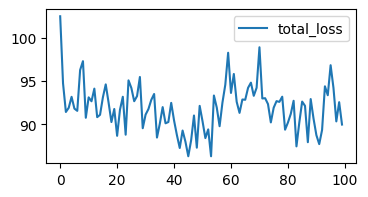

In [ ]:
sp_df = pd.read_csv('SIPR/index_data/sp500_index.csv',index_col=False)
df = sp_df['close'].values
train_recognition_module(df,dataname ='sp500')
